# Part I: Using Statistical Tests to Compare Customer Returns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg

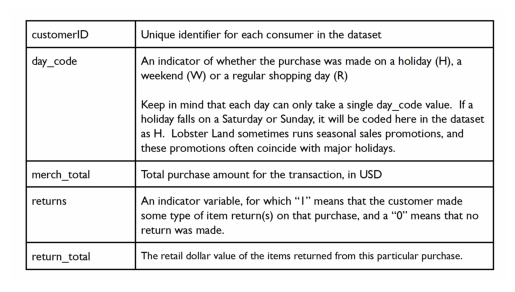

In [3]:
# Load the image
img = mpimg.imread('/Users/jiunlee/Documents/Fall_23/MarketingAnalytics/Assignment4/Screenshot 2023-11-09 at 10.20.12 PM.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and labels
plt.show()

In [4]:
merch = pd.read_csv("merch_23.csv")
merch

,purchaseID,day_code,merch_total,returns,return_total
0,1,R,17.23,0,0.00
1,2,W,34.83,0,0.00
2,3,R,25.02,1,6.26
3,4,R,39.15,0,0.00
4,5,H,18.38,0,0.00
...,...,...,...,...,...
2845,2846,H,43.50,1,32.02
2846,2847,W,34.41,0,0.00
2847,2848,W,28.83,0,0.00
2848,2849,R,19.13,0,0.00


### A. Examine your variables. Which ones are numeric, and which ones are categorical?

In [5]:
print(merch.dtypes)

purchaseID        int64
day_code         object
merch_total     float64
returns           int64
return_total    float64
dtype: object


Every variables except `merch_total` and `return_total` are categorical.`purchaseID` is numeric categorical variable that can be used as index.

###   B. What was the last item that you purchased online, and then returned? Why did you return it? (If you have never returned an item that you purchased online, just say that here – but you should still answer the next two questions). How is the returns process a hassle for consumers? How can returns be problematic for online businesses?
- 
I returned the YETI tumbler bottle because it was too heavy to carry around, so I had to return it and buy the smaller one. Returning products is inconvenient for customers, as they must personally drop off items at a UPS store. Also,  It can cause a lot of financial loss for online businesses if the returned items get damaged when shipping back to the company.


### C. Generate a barplot to show the average merch_total values, separated by the different day_code types.

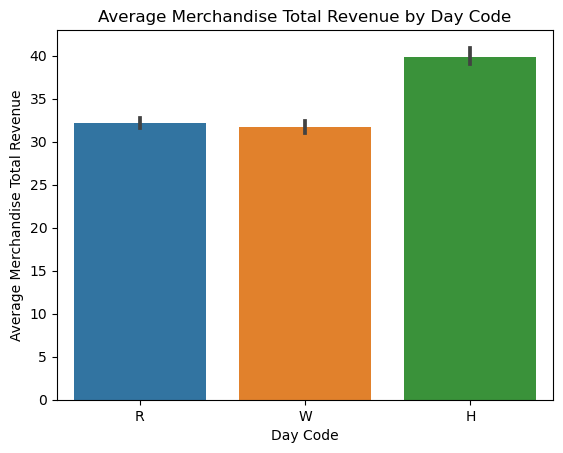

In [19]:
# calculate the mean for each 'day_code' category
sns.barplot(x='day_code', y='merch_total', data=merch)


plt.title('Average Merchandise Total Revenue by Day Code')
plt.xlabel('Day Code')
plt.ylabel('Average Merchandise Total Revenue')

plt.show()

C.a
- On Holiday(H), the average total revenue is the highest. This is a plausible result because people have more time on holidays to do online shopping. Weekdays and Regular days have roughly the same amount of average total merchandise revenue.

### D. Feature engineering (Create a new variable of return proportion)

In [14]:
#a
#create new variable
merch['return_proportion'] = merch['return_total']/merch['merch_total']
merch

,purchaseID,day_code,merch_total,returns,return_total,return_proportion
0,1,R,17.23,0,0.00,0.000000
1,2,W,34.83,0,0.00,0.000000
2,3,R,25.02,1,6.26,0.250200
3,4,R,39.15,0,0.00,0.000000
4,5,H,18.38,0,0.00,0.000000
...,...,...,...,...,...,...
2845,2846,H,43.50,1,32.02,0.736092
2846,2847,W,34.41,0,0.00,0.000000
2847,2848,W,28.83,0,0.00,0.000000
2848,2849,R,19.13,0,0.00,0.000000


### E. Statistical tests (two-sample t-tests) to make comparisons among each of the day_code groups. 
Since we have three groups, we’ll need to run three tests (R vs. H, R vs. W, and H vs. W). 
Response variable in these tests will be `return_proportion`.

a. What null hypothesis will you use for your tests?
- The two-sample t-test (i.e. the independent samples t-test) is to determine if there is a significant difference between the means of two independent groups. The null hypothesis will be "The means of two groups (R vs H, R vs W, and H vs W) are the same." 

b. What alpha threshold do you wish to use for this test?
- Since the standard alpha of 0.05 is commonly used, I will use alpha of 0.05.


c. What is a Bonferroni correction? Explain its purpose.

-  When conducting multiple tests, the risk of getting Type I error increases.This problem is called as "multiple comparisons problem" or "multiple testing problem." Bonferroni correction are used to adjust the alpha level to account for the number of comparisons being made.



d. With a Bonferroni correction in mind, what is the new alpha threshold that you will use for the three tests?
- Bonferroni correction adjusts the alpha level by dividing it by the number of tests. 
- Adjusted Alpha = Original Alpha / Nunber of tests = 0.05/3 = 0.0167. So, I will use 0.0167 as new alpha threshold.



e. Execute the three tests

In [8]:
from scipy import stats


group_R = merch[merch['day_code']=="R"]['return_proportion']
group_H = merch[merch['day_code']=="H"]['return_proportion']
group_W = merch[merch['day_code']=="W"]['return_proportion']

# T-test between Group R and Group H
t_statistic, p_value_ab = stats.ttest_ind(group_R, group_H, equal_var=True)  # equal_var is False for Welch's t-test
print(f"R vs H: t-statistic = {t_statistic}, p-value = {p_value_ab}")

# T-test between Group R and Group W
t_statistic, p_value_ab = stats.ttest_ind(group_R, group_W, equal_var=True)  # equal_var is False for Welch's t-test
print(f"R vs W: t-statistic = {t_statistic}, p-value = {p_value_ab}")

# T-test between Group H and Group W
t_statistic, p_value_ab = stats.ttest_ind(group_H, group_W, equal_var=True)  # equal_var is False for Welch's t-test
print(f"H vs W: t-statistic = {t_statistic}, p-value = {p_value_ab}")



R vs H: t-statistic = -2.6368275778750876, p-value = 0.008437632002881588
R vs W: t-statistic = -0.5350242797628775, p-value = 0.5926850371557939
H vs W: t-statistic = 2.0239658771157774, p-value = 0.043147154842248056


f. 
- Considering the alpha threshold that I decided above (alpha=0.0167), the difference in return proportion between R and H groups is statistically significant since the pvalue (0.008) is smaller than alpha. However, the differences between 'R and W' and 'H and W' are not statistically significant based on their high p values. 
- Regular day and Holiday's returnings are significantly different. Since the t-statistic is negative, it can be interpreted that Holiday has more returnings than Regular day. This can be seen on the graph below as well.

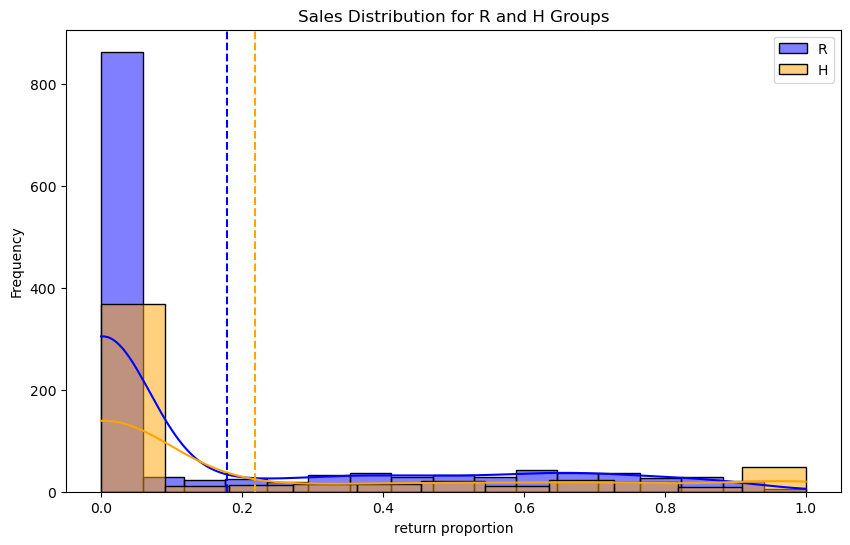

T-Statistic: -2.6368275778750876
P-Value: 0.008437632002881588


In [11]:
#visualization of t test

t_statistic, p_value_ab = stats.ttest_ind(group_R, group_H, equal_var=True) 

plt.figure(figsize=(10, 6))

# Histograms for both groups
sns.histplot(group_R, color="blue", kde=True, label="R")
sns.histplot(group_H, color="orange", kde=True, label="H")

# Adding mean lines
plt.axvline(np.mean(group_R), color='blue', linestyle='dashed', linewidth=1.5)
plt.axvline(np.mean(group_H), color='orange', linestyle='dashed', linewidth=1.5)

# Adding legends and labels
plt.legend()
plt.title("Sales Distribution for R and H Groups")
plt.xlabel("return proportion")
plt.ylabel("Frequency")

# Show plot
plt.show()

# Print t-test result
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_ab)

### F. Filter the data. Discard the rows for which there was no return at all

In [10]:
merch_return = merch[merch['returns']==1] #filtering out returns=0

In [13]:
#grouping each day_code
group_R = merch_return[merch_return['day_code']=="R"]['return_proportion']
group_H = merch_return[merch_return['day_code']=="H"]['return_proportion']
group_W = merch_return[merch_return['day_code']=="W"]['return_proportion']

print("(a)")

# T-test between Group R and Group H
t_statistic, p_value_ab = stats.ttest_ind(group_R, group_H, equal_var=True)  # equal_var is False for Welch's t-test
print(f"R vs H: t-statistic = {t_statistic}, p-value = {p_value_ab}")

# T-test between Group R and Group W
t_statistic, p_value_ab = stats.ttest_ind(group_R, group_W, equal_var=True)  # equal_var is False for Welch's t-test
print(f"R vs W: t-statistic = {t_statistic}, p-value = {p_value_ab}")

# T-test between Group H and Group W
t_statistic, p_value_ab = stats.ttest_ind(group_H, group_W, equal_var=True)  # equal_var is False for Welch's t-test
print(f"H vs W: t-statistic = {t_statistic}, p-value = {p_value_ab}")


(a)
R vs H: t-statistic = -4.651403790918648, p-value = 3.9521989910135765e-06
R vs W: t-statistic = -0.7047183404203791, p-value = 0.48117971941961757
H vs W: t-statistic = 3.6787043731124376, p-value = 0.0002566759924224039


b. In a few sentences, based on these results, what can you suggest for Lobster Land?
- With the alpha threshold of 0.0167, the difference in return proportion between R vs H and H vs W is statistically significant since their p values are smaller than 0.0167. Also, from the t-statistic from the two comparisons, we can confirm that holidays have more returns than regular days and weekends (R<H, H>W). Despite holidays generating the highest revenue, as seen in the bar plot, the proportion of returns to total revenue is also higher on these days. To fix this, Lobster Land could focus on either increasing their revenue further or minimizing returns. They can improve the product quality for fewer returns or implement special holiday promotions to boost revenue.

# Part II: Chi-Square Goodness of Fit
Our goal will be to determine whether day_code impacts the likelihood that a consumer will return something after making a purchase.
- Response variable: `returns`
- Groupving variable: `day_code`

### A. What is the null hypothesis of this test? What is the alternative hypothesis?
a. Under the null hypothesis, what is our expected number of ‘H’ purchasers who make returns of some kind? What is our expected number of ‘W’ purchasers who make returns of some kind? What is our expected number of ‘R’ purchasers who make returns of some kind?


- Null Hypothesis (H0): `day_code` does not impact the likelihood of returns. The distribution of returns is the same for regular days, holidays, and weekends.
- Alternative Hypothesis (H1): `day_code` does impact the likelihood of returns. The distribution of returns differs among regular days, holidays, and weekends.

In [11]:
# Calculate overall return rate
overall_return_rate = merch['returns'].mean()
print("- Overall return rate is" , overall_return_rate)

# Calculate total purchases for each day_code
total_purchases = merch['day_code'].value_counts()

# Calculate expected returns for each day_code
expected_returns = total_purchases * overall_return_rate

# Print the expected returns
print("- Expected number of returns is")
print(expected_returns)

- Overall return rate is 0.3701754385964912
- Expected number of returns is
R    487.891228
W    360.180702
H    206.928070
Name: day_code, dtype: float64


### B. Using the actual numbers of people from each of the three groups who made returns, run a chi-square goodness of fit test to assess your null hypothesis.

In [12]:
observed_returns = merch[merch['returns'] == 1]['day_code'].value_counts()
print(observed_returns)
# Perform Chi-Square Goodness of Fit Test
chi_square_stat, p_value = stats.chisquare(observed_returns, f_exp=expected_returns)

# Output the results
print(f"Chi-Square Statistic: {chi_square_stat}, P-Value: {p_value}")


R    484
W    363
H    208
Name: day_code, dtype: int64
Chi-Square Statistic: 0.05865564733537252, P-Value: 0.9710980633509348


a. What is the p-value of this test? Based on this value, what will you
conclude? Be sure to mention the null hypothesis in your answer to this
question
- This test returns high p-value of 0,971, so we cannot reject the null hypothesis. So we can assume that the daycode does not affet the likelihood of returns, so the overall return rate is applied uniformly across all day codes.  

### C. Demonstrate where the chi-square number from your test came from.

- Observed returns: 'R': 484, 'W': 363, 'H': 208
- Expected returns: 'R': 487.891228, 'W': 360.180702, 'H': 206.928070

The Chi-Square statistic is calculated as:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

where:
- \( O_i \) = Observed frequency for group \( i=R,W,H \)
- \( E_i \) = Expected frequency for group \( i=R,W,H \)
- The sum is taken over all categories.

For each group:
$$ R: \frac{(484 - 487.891228)^2}{487.891228} \approx \frac{(-3.891228)^2}{487.891228} \approx 0.031013 $$
$$ W: \frac{(363 - 360.180702)^2}{360.180702} \approx \frac{2.819298^2}{360.180702} \approx 0.022034 $$
$$ H: \frac{(208 - 206.928070)^2}{206.928070} \approx \frac{1.07193^2}{206.928070} \approx 0.005609 $$

And then summing up,
$$ \chi^2 \approx 0.031013 + 0.022034 + 0.005609 \approx 0.058656 $$

Therefore, the Chi-Square statistic we got from scipy library can be proven by this formula.

# Part III: Using Tableau to Build a Dashboard

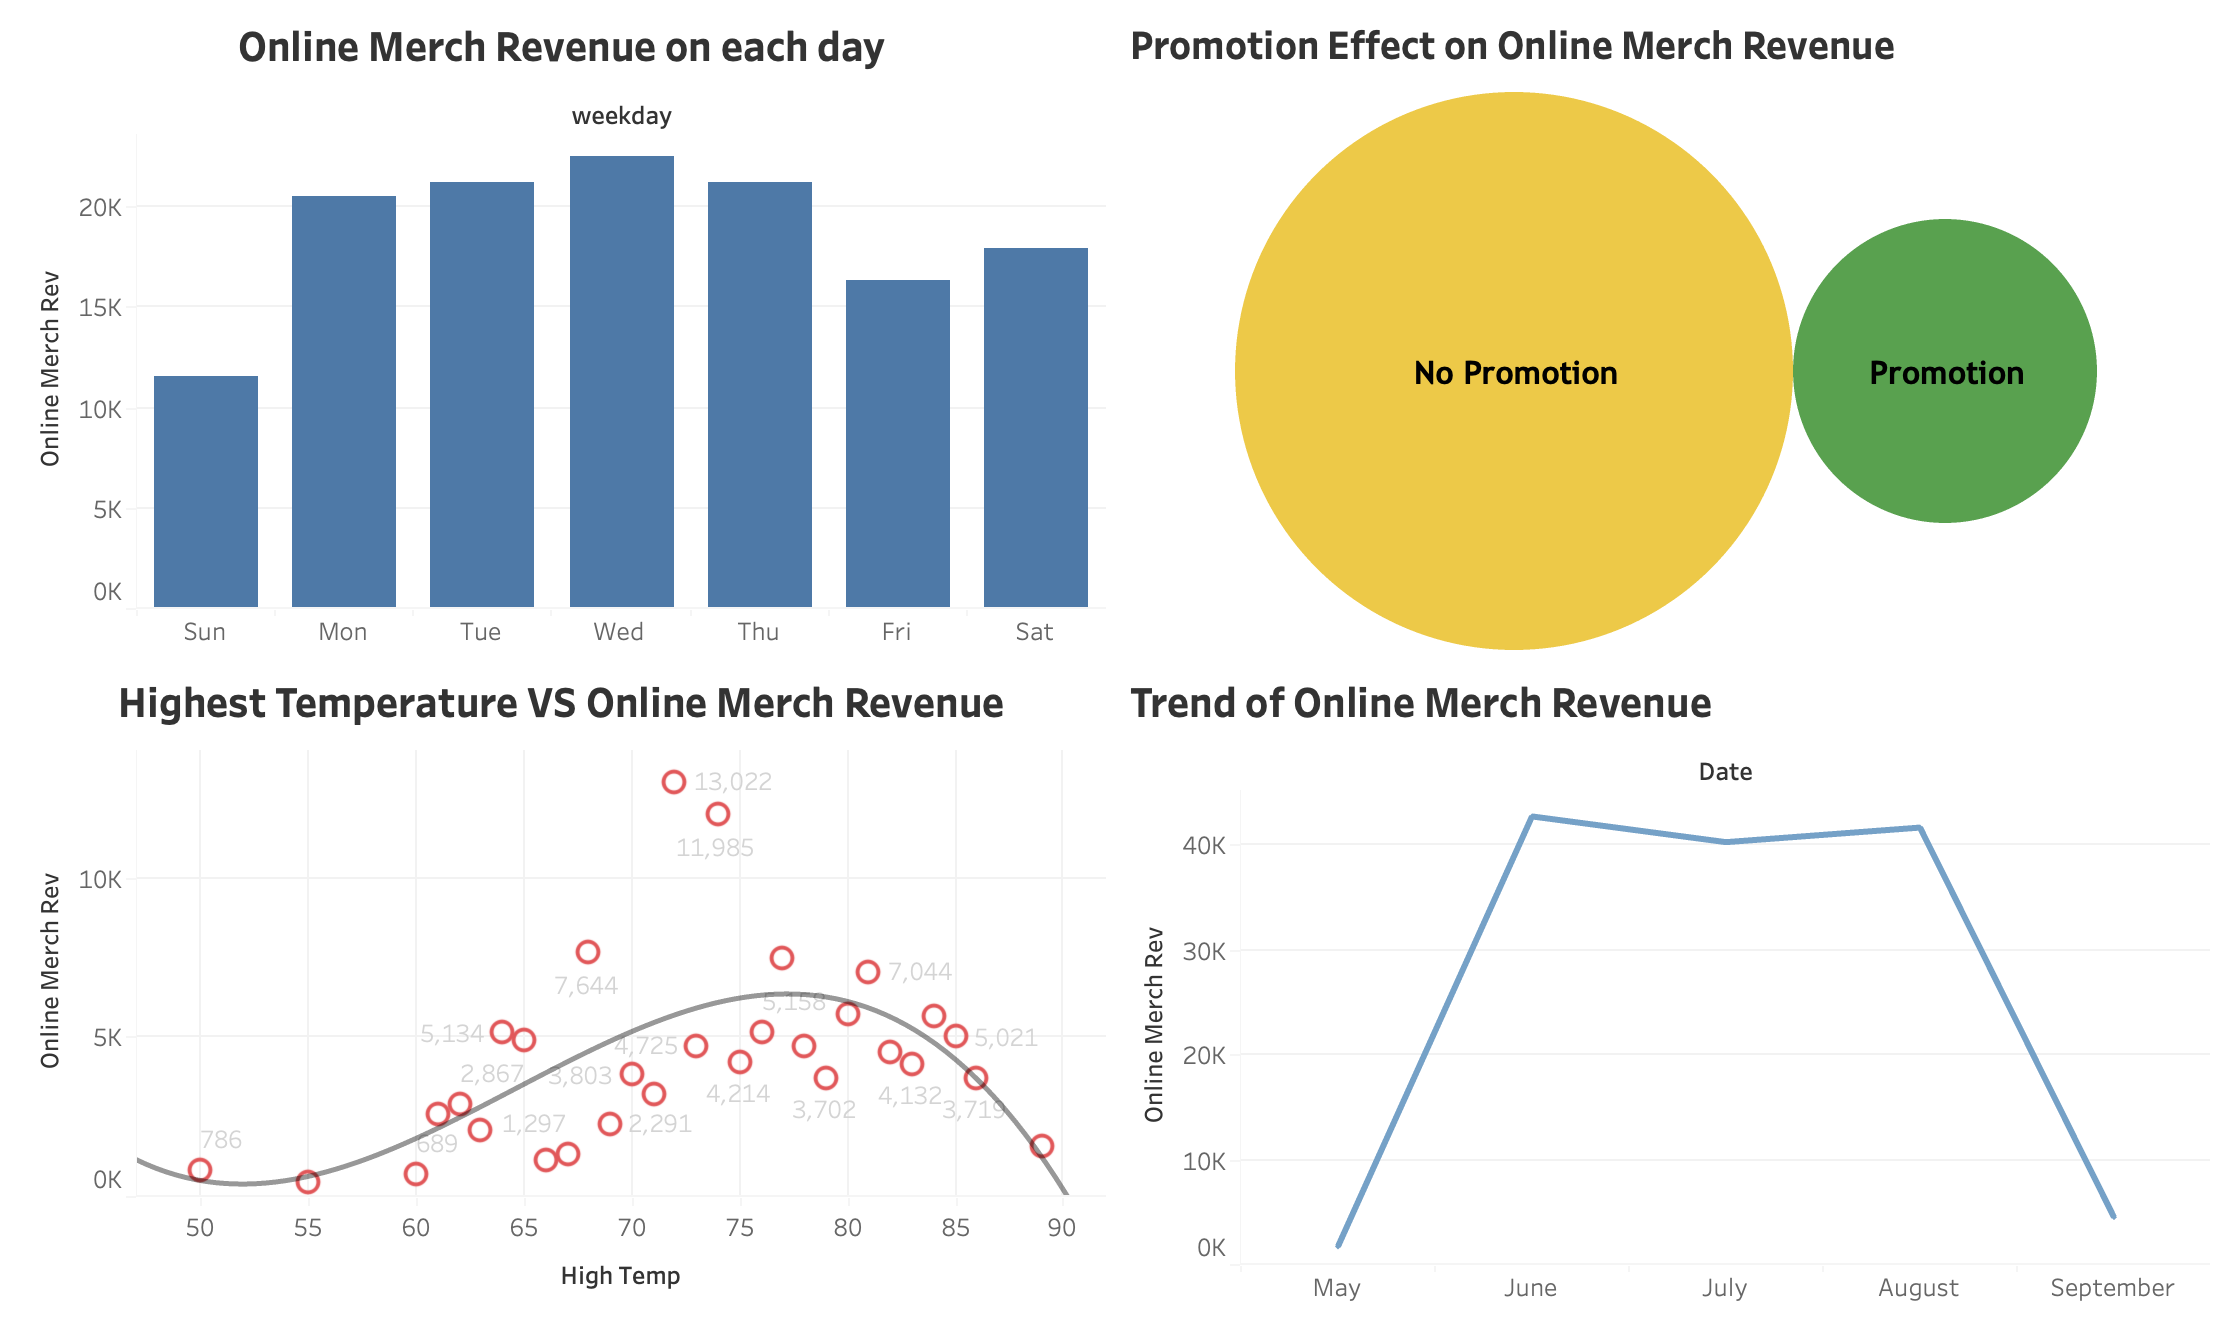

In [20]:
PATH = '/Users/jiunlee/Documents/Fall_23/MarketingAnalytics/Assignment4/Screenshot 2023-11-13 at 2.00.00 AM.png'
from IPython.display import Image
Image(filename = PATH, width=75000, height=500)

I focused on what affects online merch revenue by setting `online_merch_rev` as a dependent variable for each plot. If we see what affects revenue, we can determine how to increase profit to offset the returns. The barplot shows regular days(Mon-Fri) generate more revenue than weekends. The average merch total revenue plot in the C question above also showed this. In the second plot, It seems like promotion doesn't positively affect revenue, so promotion will not be a solution for boosting revenue. Lobster Land might need another strategy for that. Lastly, the online merch revenue tends to be higher around 70 to 85F and around June to August. I assume people tend to shop online more often when the weather is too hot. 

https://public.tableau.com/app/profile/jiun.lee/viz/OnlineMerchRevenue/Dashboard1?publish=yes